# `projected_winners_place_higher_under_normal_weather_conditions.ipynb`

### Author: Anthony Hein

#### Last updated: 11/8/2021

# Overview:

This notebook shows that projected winners place higher under normal weather conditions.

---

## Setup

In [1]:
from datetime import datetime
import git
import os
import re
from typing import List
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Load `races_featurized.csv`

In [3]:
races_featurized = pd.read_csv(f"{BASE_DIR}/data/streamline/races_featurized.csv", low_memory=False) 
races_featurized.head()

,rid,course,title,winningTime,metric,ncond,class,runners,margin,1st_place_rank_in_odds,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
0,302858,Thurles,Liffey Maiden Hurdle (Div 1),277.2,3821.0,1,0,6,1.219263,1,...,0,1,0,0,0,0,0,0,1,1.350363
1,291347,Punchestown,Ericsson G.S.M. Grand National Trial Handicap ...,447.2,5229.0,5,0,9,1.218049,4,...,1,0,0,1,0,0,0,0,1,1.995151
2,75447,Listowel,Ballybunion E.B.F. Beginners S'chase,318.4,3620.0,5,0,8,1.277320,3,...,1,0,0,0,0,0,0,1,0,1.786421
3,358038,Punchestown,Quinns Of Baltinglass Chase (La Touche) (Cross...,533.9,6637.0,1,0,10,1.286595,1,...,0,1,0,0,0,0,0,1,0,1.611062
4,89211,Tipperary,Topaz Sprint Stakes (Listed),59.9,1005.0,4,0,5,1.217043,4,...,1,0,0,0,0,0,1,0,0,1.254374


In [4]:
races_featurized.shape

(20201, 129)

---

## Normal Weather Conditions

In [70]:
dfa = races_featurized[
    ((races_featurized['temp_level_1'] == 1) | (races_featurized['temp_level_2'] == 1) | (races_featurized['temp_level_3'] == 1)) &
    ((races_featurized['pressure_level_3'] == 1) | (races_featurized['pressure_level_4'] == 1)) &
    ((races_featurized['rhum_level_1'] == 1) | (races_featurized['rhum_level_2'] == 1) | (races_featurized['rhum_level_3'] == 1)) &
    (races_featurized['is_raining'] == 0)
]

dfb = races_featurized[
    ~(((races_featurized['temp_level_1'] == 1) | (races_featurized['temp_level_2'] == 1) | (races_featurized['temp_level_3'] == 1)) &
    ((races_featurized['pressure_level_3'] == 1) | (races_featurized['pressure_level_4'] == 1)) &
    ((races_featurized['rhum_level_1'] == 1) | (races_featurized['rhum_level_2'] == 1) | (races_featurized['rhum_level_3'] == 1)) &
    (races_featurized['is_raining'] == 0))
]

len(dfa), len(dfb)

(10520, 9681)

In [39]:
np.mean(dfa['1st_rank_in_odds_place'])

2.8752851711026617

In [72]:
np.mean(dfa['1st_rank_in_odds_place'] <= 3)

0.7211026615969581

In [41]:
np.mean(dfb['1st_rank_in_odds_place'])

2.9838859621939884

In [42]:
np.mean(dfb['1st_rank_in_odds_place'] <= 3)

0.7042660882140275

In [43]:
stats.ttest_ind(dfa['1st_rank_in_odds_place'],
                dfb['1st_rank_in_odds_place'],
                equal_var=False)

Ttest_indResult(statistic=-3.1839144172611182, pvalue=0.0014552212766804767)

In [44]:
stats.ttest_ind(dfa['1st_rank_in_odds_place'] <= 3,
                dfb['1st_rank_in_odds_place'] <= 3,
                equal_var=False)

Ttest_indResult(statistic=2.6412096467594615, pvalue=0.008267481716040153)

{'whiskers': [<matplotlib.lines.Line2D at 0x136108460>,
 'caps': [<matplotlib.lines.Line2D at 0x136108b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x136108100>,
 'medians': [<matplotlib.lines.Line2D at 0x1361172e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x136117a00>,
 'means': [<matplotlib.lines.Line2D at 0x136117670>,
  <matplotlib.lines.Line2D at 0x13612d370>]}

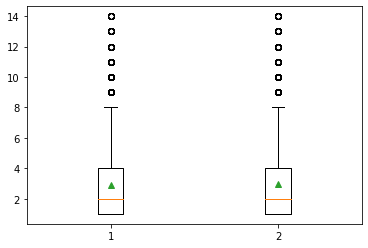

In [45]:
plt.boxplot(
    [dfa['1st_rank_in_odds_place'],
     dfb['1st_rank_in_odds_place'],
    ],
    showmeans=True
)

In [46]:
np.mean(dfa['2nd_rank_in_odds_place'])

3.6272813688212926

In [47]:
np.mean(dfb['2nd_rank_in_odds_place'])

3.7331887201735356

In [48]:
stats.ttest_ind(dfa['2nd_rank_in_odds_place'],
                dfb['2nd_rank_in_odds_place'],
                equal_var=False)

Ttest_indResult(statistic=-2.847836112802376, pvalue=0.004406261126050298)

{'whiskers': [<matplotlib.lines.Line2D at 0x136190520>,
 'caps': [<matplotlib.lines.Line2D at 0x136190c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x136190190>,
 'medians': [<matplotlib.lines.Line2D at 0x13619c3a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13619cac0>,
 'means': [<matplotlib.lines.Line2D at 0x13619c730>,
  <matplotlib.lines.Line2D at 0x1361b5460>]}

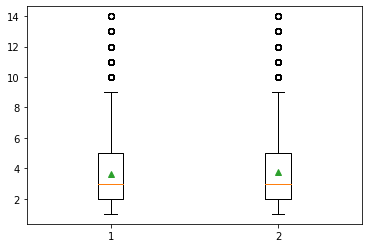

In [49]:
plt.boxplot(
    [dfa['2nd_rank_in_odds_place'],
     dfb['2nd_rank_in_odds_place'],
    ],
    showmeans=True
)

In [50]:
np.mean(dfa['3rd_rank_in_odds_place'])

4.1639733840304185

In [51]:
np.mean(dfb['3rd_rank_in_odds_place'])

4.360499948352443

In [52]:
stats.ttest_ind(dfa['3rd_rank_in_odds_place'],
                dfb['3rd_rank_in_odds_place'],
                equal_var=False)

Ttest_indResult(statistic=-5.11455882868315, pvalue=3.174040135529447e-07)

{'whiskers': [<matplotlib.lines.Line2D at 0x136217430>,
 'caps': [<matplotlib.lines.Line2D at 0x136217b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1362170a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1362232b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1362239d0>,
 'means': [<matplotlib.lines.Line2D at 0x136223640>,
  <matplotlib.lines.Line2D at 0x13623a340>]}

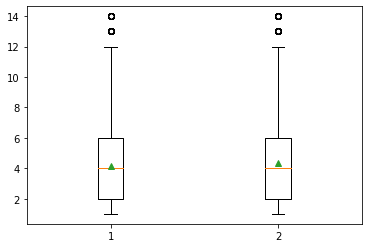

In [53]:
plt.boxplot(
    [dfa['3rd_rank_in_odds_place'],
     dfb['3rd_rank_in_odds_place'],
    ],
    showmeans=True
)

In [54]:
np.mean(dfa['favoriteWon'])

0.37813688212927754

In [55]:
np.mean(dfb['favoriteWon'])

0.36287573597768824

In [56]:
stats.ttest_ind(dfa['favoriteWon'],
                dfb['favoriteWon'],
                equal_var=False)

Ttest_indResult(statistic=2.2443175364888015, pvalue=0.024822820597292246)

In [57]:
np.mean(dfa[dfa['placeAvailable'] == 1]['favoritePlaced'])

0.5763717251606525

In [58]:
np.mean(dfb[dfb['placeAvailable'] == 1]['favoritePlaced'])

0.5724189419795221

In [59]:
stats.ttest_ind(dfa[dfa['placeAvailable'] == 1]['favoritePlaced'],
                dfb[dfb['placeAvailable'] == 1]['favoritePlaced'],
                equal_var=False)

Ttest_indResult(statistic=0.5576224510612968, pvalue=0.5771086649886357)

In [60]:
np.mean(dfa[dfa['showAvailable'] == 1]['favoriteShowed'])

0.6762243085511291

In [61]:
np.mean(dfb[dfb['showAvailable'] == 1]['favoriteShowed'])

0.6654343807763401

In [62]:
stats.ttest_ind(dfa[dfa['showAvailable'] == 1]['favoriteShowed'],
                dfb[dfb['showAvailable'] == 1]['favoriteShowed'],
                equal_var=False)

Ttest_indResult(statistic=1.426916764568182, pvalue=0.1536241378757653)

(array([[0.45144779, 0.10324656, 0.0682217 , 0.07648435, 0.02500731,
         0.01447792, 0.01930389, 0.00497221, 0.00329044, 0.00277859],
        [0.44599652, 0.09574663, 0.06928718, 0.08120585, 0.02463191,
         0.01763963, 0.0199439 , 0.00572096, 0.00468801, 0.00437018]]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 2 BarContainer objects>)

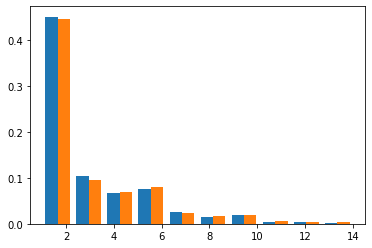

In [75]:
plt.hist([dfa['1st_rank_in_odds_place'], dfb['1st_rank_in_odds_place']], density=True)

(array([[0.3329921 , 0.12525592, 0.09059667, 0.11509213, 0.03319684,
         0.02420298, 0.02902896, 0.00731208, 0.00584966, 0.00570342],
        [0.32379045, 0.1215704 , 0.09272723, 0.11616727, 0.03623275,
         0.02510866, 0.03138582, 0.00889927, 0.00595933, 0.00738957]]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 2 BarContainer objects>)

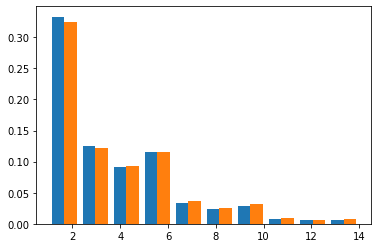

In [79]:
plt.hist([dfa['2nd_rank_in_odds_place'], dfb['2nd_rank_in_odds_place']], density=True)

(array([[0.23369406, 0.14565662, 0.11202106, 0.1452179 , 0.04204446,
         0.02815151, 0.03838842, 0.0112606 , 0.00621527, 0.00658087],
        [0.22462714, 0.13881274, 0.10456644, 0.14596394, 0.04425798,
         0.03742461, 0.0429072 , 0.01271324, 0.00929656, 0.0086609 ]]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 2 BarContainer objects>)

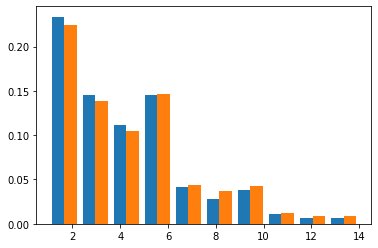

In [80]:
plt.hist([dfa['3rd_rank_in_odds_place'], dfb['3rd_rank_in_odds_place']], density=True)

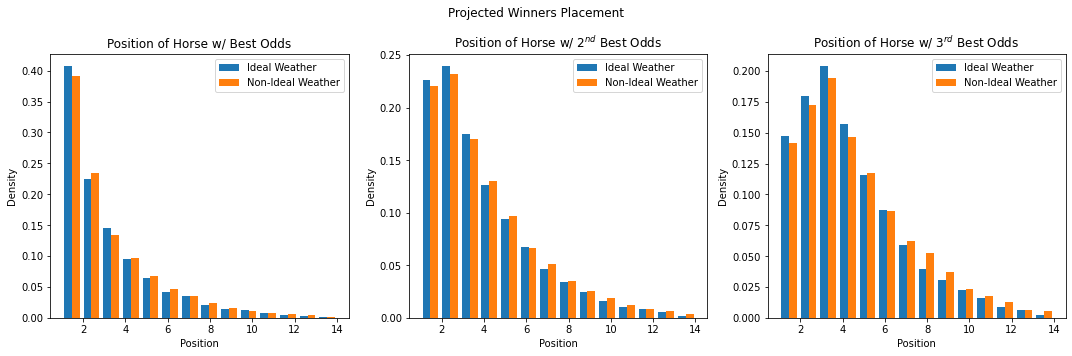

In [112]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 3)

fig.suptitle("Projected Winners Placement")

ax1 = fig.add_subplot(gs[0:1, 0:1])
ax2 = fig.add_subplot(gs[0:1, 1:2])
ax3 = fig.add_subplot(gs[0:1, 2:3])

ax1.set_title('Position of Horse w/ Best Odds')
ax1.hist([dfa['1st_rank_in_odds_place'], dfb['1st_rank_in_odds_place']],
         label=['Ideal Weather', 'Non-Ideal Weather'],
         bins=14,
         density=True)
ax1.set_xlabel("Position")
ax1.set_ylabel("Density")
ax1.legend()

ax2.set_title('Position of Horse w/ $2^{nd}$ Best Odds')
ax2.hist([dfa['2nd_rank_in_odds_place'], dfb['2nd_rank_in_odds_place']],
         label=['Ideal Weather', 'Non-Ideal Weather'],
         bins=14,
         density=True)
ax2.set_xlabel("Position")
ax2.set_ylabel("Density")
ax2.legend()

ax3.set_title('Position of Horse w/ $3^{rd}$ Best Odds')
ax3.hist([dfa['3rd_rank_in_odds_place'], dfb['3rd_rank_in_odds_place']],
         label=['Ideal Weather', 'Non-Ideal Weather'],
         bins=14,
         density=True)
ax3.set_xlabel("Position")
ax3.set_ylabel("Density")
ax3.legend()

plt.tight_layout()

fig.savefig(f"{BASE_DIR}/figures/projected_winners_placement.png")

plt.show()

---